   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

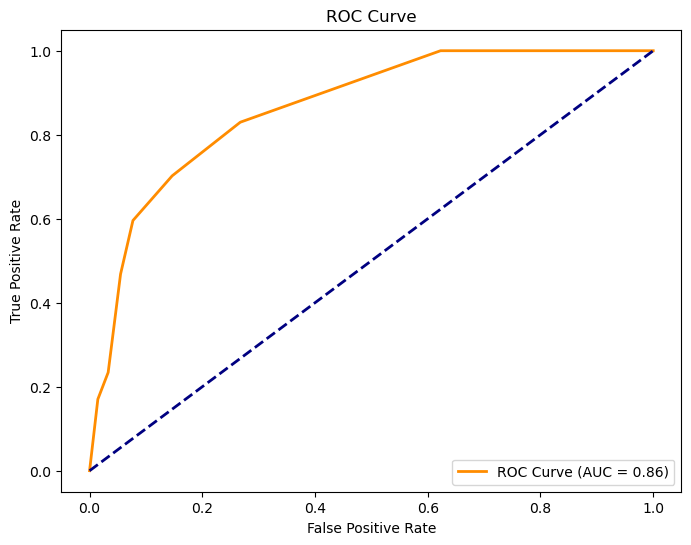

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the dataset
url = "https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Red%20Wine/winequality-red.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Define a binary classification for 'good' (quality >= 7) and 'not good' (quality < 7)
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Split the data into features (X) and target variable (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Train the Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model
print("Best Hyperparameters:", best_params)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot ROC curve
y_prob = best_dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
